In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path

plt.rcParams['figure.figsize'] = (6, 4)
data_path = Path('ckpt/block_normal/Ours_GAT/400_gat_full_attn.fp16.npz')  

In [3]:
A = np.load(data_path)['arr_0']
E, T, H, N, _ = A.shape
print('Loaded', A.shape)
#shape (E, T, H, N, N)

Loaded (10, 24, 4, 16, 16)


In [ ]:
print("zeros:", (A == 0).mean(), "  rows-sum:", np.abs(A.sum(-1)-1).max())

zeros: 0.8309651692708333   rows-sum: 1.424


AssertionError: 

In [25]:
ep_mean = data.mean(axis=1)   # (E,H,N,N)
E, H, N, _ = ep_mean.shape

[[0.3835393  0.38520086 0.3840603  0.38306245]
 [0.38267422 0.38545406 0.38353947 0.38461676]
 [0.38480246 0.38448045 0.3850884  0.3850153 ]
 [0.38443187 0.3831979  0.38293928 0.38397044]
 [0.3850722  0.38398892 0.3851484  0.38394323]
 [0.38338292 0.38414785 0.38474798 0.38367867]
 [0.38447005 0.38462225 0.38469285 0.3841751 ]
 [0.38466454 0.38575137 0.3822381  0.38347557]
 [0.3846477  0.38431948 0.38414612 0.38494128]
 [0.3845882  0.38417497 0.38279468 0.38507465]]


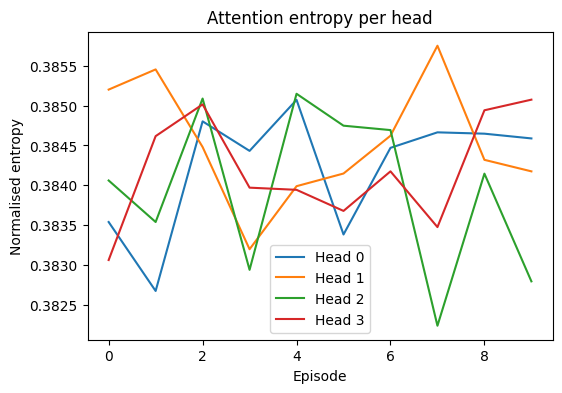

In [ ]:
ent = entropy(ep_mean, axis=(-2, -1))
for h in range(H):
    plt.plot(ent[:, h], label=f'Head {h}')
plt.xlabel('Episode'); plt.ylabel('Normalised entropy')
plt.title('Attention entropy per head')
plt.legend(); plt.show()
